2024-11-04 23:36:12.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:12.494 
  command:

    streamlit run /home/soumya/PycharmProjects/Virtual-Assistant/.venv/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-04 23:36:12.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:12.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:12.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:12.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:12.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-

{'Linear Regression': {'MAE': 159.42861868734656,
  'RMSE': 208.40566399003265,
  'R^2': 0.5605043179997115},
 'Random Forest': {'MAE': 88.94576312409703,
  'RMSE': 157.7099864938757,
  'R^2': 0.7483169514426458},
 'Gradient Boosting': {'MAE': 108.43839732373647,
  'RMSE': 172.42969004504644,
  'R^2': 0.699143310958568},
 'XGBoost': {'MAE': 96.40605140924043,
  'RMSE': 163.21076120190168,
  'R^2': 0.7304538349587559}}

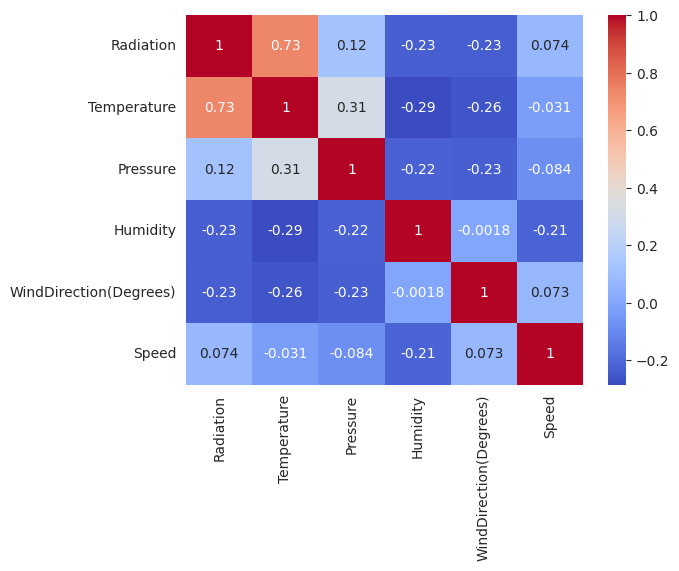

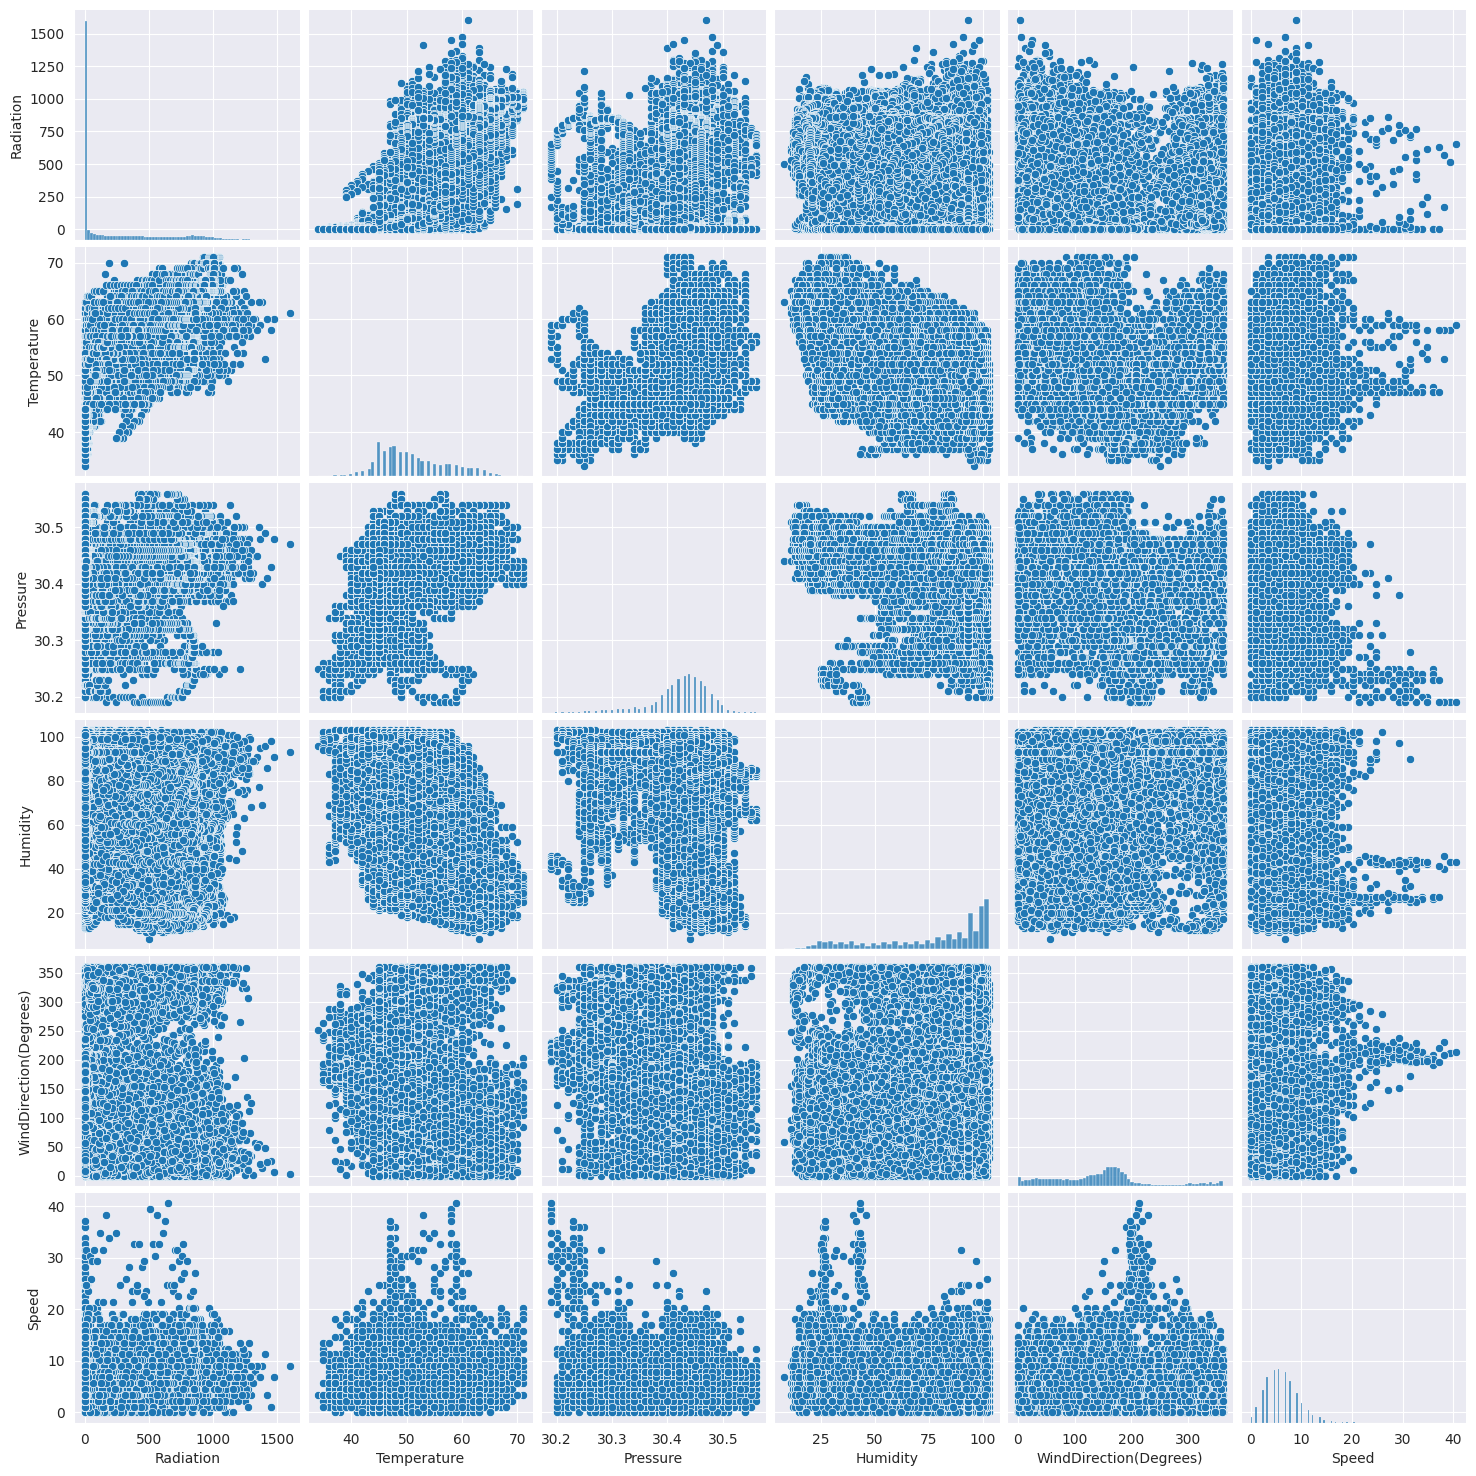

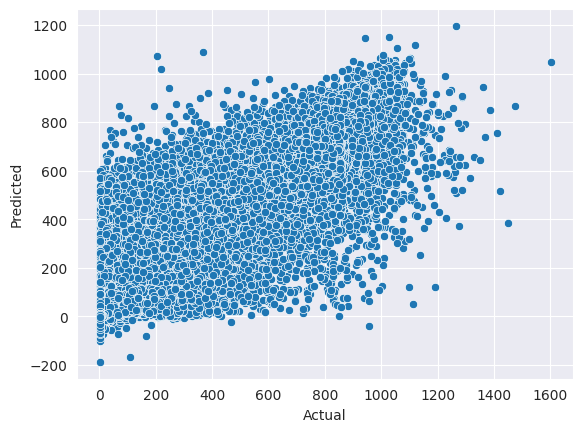

In [1]:
from app import df
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import numpy as np

# Split data into train and test sets
X = df.drop('Radiation', axis=1)  # Assuming 'Radiation' is the target
y = df['Radiation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Dictionary to store model performance
model_metrics = {}

# Train models and compute metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics in dictionary
    model_metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R^2': r2}

# Display metrics
model_metrics


In [2]:
import streamlit as st

# Display the dropdown for model selection
st.title("Interactive Model Comparison for Solar Radiation Prediction")

selected_model = st.selectbox("Choose a model for prediction:", list(models.keys()))

# Display metrics for the selected model
st.write(f"**Performance Metrics for {selected_model}:**")
st.write("MAE:", model_metrics[selected_model]['MAE'])
st.write("RMSE:", model_metrics[selected_model]['RMSE'])
st.write("R²:", model_metrics[selected_model]['R^2'])


2024-11-04 23:36:53.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.272 Session state does not function when running a script without `streamlit run`
2024-11-04 23:36:53.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36

In [3]:
# User input for prediction
st.subheader("Enter values for prediction:")

temp = st.number_input("Temperature")
humidity = st.number_input("Humidity")
pressure = st.number_input("Pressure")
speed = st.number_input("Speed")
wind_direction = st.number_input("Wind Direction (Degrees)")

if st.button("Predict Radiation"):
    input_data = [[temp, humidity, pressure, speed, wind_direction]]
    
    # Get the selected model and make prediction
    prediction = models[selected_model].predict(input_data)
    st.write(f"Predicted Radiation: {prediction[0]:.2f}")


2024-11-04 23:36:53.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [4]:
import pandas as pd
import plotly.express as px

# Convert model_metrics to DataFrame
metrics_df = pd.DataFrame(model_metrics).T.reset_index().rename(columns={'index': 'Model'})

# Display as a table
st.subheader("Model Comparison Table")
st.write(metrics_df)

# Display as a bar chart
fig = px.bar(metrics_df, x='Model', y=['MAE', 'RMSE', 'R^2'],
             title="Model Performance Comparison",
             labels={'value': 'Score', 'Model': 'Model'},
             barmode='group')
st.plotly_chart(fig)


2024-11-04 23:36:53.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 23:36:53.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()